In [30]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
import itertools

indexes = list(itertools.product([0,1,2,3,4,5,6,7],[0,1,2],[0,1,2]))
print(indexes)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 2, 0), (4, 2, 1), (4, 2, 2), (5, 0, 0), (5, 0, 1), (5, 0, 2), (5, 1, 0), (5, 1, 1), (5, 1, 2), (5, 2, 0), (5, 2, 1), (5, 2, 2), (6, 0, 0), (6, 0, 1), (6, 0, 2), (6, 1, 0), (6, 1, 1), (6, 1, 2), (6, 2, 0), (6, 2, 1), (6, 2, 2), (7, 0, 0), (7, 0, 1), (7, 0, 2), (7, 1, 0), (7, 1, 1), (7, 1, 2), (7, 2, 0), (7, 2, 1), (7, 2, 2)]


In [32]:
def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]

In [47]:
def get_F(h, s, v):
    h_norm = normalize(
        h,
        {'actual': {'lower': 0, 'upper': 179}, 'desired': {'lower': 0, 'upper': 360}}
    )
    s_norm = normalize(
        s,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    v_norm = normalize(
        v,
        {'actual': {'lower': 0, 'upper': 255}, 'desired': {'lower': 0, 'upper': 1}}
    )
    
    h_norm = np.array(h_norm).flatten()
    s_norm = np.array(s_norm).flatten()
    v_norm = np.array(v_norm).flatten()
    
    h_d = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0}
    s_d = {0:0, 1:0, 2:0}
    v_d = {0:0, 1:0, 2:0}

    for i in range(len(h_norm)):
        H = h_norm[i]
        ha = None
        if H >= 316 or H <= 20:
            ha = 0
        elif H >= 21 and H <= 40:
            ha = 1
        elif H >= 41 and H <= 75:
            ha = 2
        elif H >= 76 and H <= 155:
            ha = 3
        elif H >= 156 and H <= 190:
            ha = 4
        elif H >= 191 and H <= 270:
            ha = 5
        elif H >= 271 and H <= 295:
            ha = 6
        elif H >= 296 and H <= 315:
            ha = 7
        if ha not in h_d:
            h_d[ha] = 1
        else:
            h_d[ha] += 1

    for i in range(len(s_norm)):
        S = s_norm[i]
        sa = None
        if S >= 0 and S <= 0.2:
            sa = 0
        elif S > 0.2 and S <= 0.7:
            sa = 1
        elif S > 0.7 and S <= 1:
            sa = 2
        if sa not in s_d:
            s_d[sa] = 1
        else:
            s_d[sa] += 1

    for i in range(len(v_norm)):
        V = v_norm[i]
        va = None
        if V >= 0 and V <= 0.2:
            va = 0
        elif V > 0.2 and V <= 0.7:
            va = 1
        elif V > 0.7 and V <= 1:
            va = 2
        if va not in v_d:
            v_d[va] = 1
        else:
            v_d[va] += 1
            
    F = np.zeros((72,))
    
    for i in range(8):
        for j in range(3):
            for k in range(3):
                F[indexes.index((i, j, k))] = 9*h_d[i] + 3*s_d[j] + v_d[k]
    return F

In [51]:
import os
from os import listdir

colour_features = []
count = 0
 
folder_dir = "C:\\Users\\Souvik\\Desktop\\Base Paper\\Frames"
for images in os.listdir(folder_dir):
    img = cv2.imread(os.path.join(folder_dir,images))
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    F = get_F(h, s, v)
    #print(F)
    colour_features.append(F)
    count += 1
    if(count%10 == 0):
        print("{count} images done".format(count=count))
    """
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()
    """

10 images done
20 images done
30 images done
40 images done
50 images done
60 images done
70 images done
80 images done
90 images done
100 images done
110 images done
120 images done
130 images done
140 images done
150 images done
160 images done
170 images done
180 images done
190 images done
200 images done
210 images done
220 images done
230 images done
240 images done
250 images done
260 images done
270 images done
280 images done
290 images done
300 images done
310 images done
320 images done
330 images done
340 images done
350 images done
360 images done
370 images done
380 images done
390 images done
400 images done
410 images done
420 images done
430 images done
440 images done
450 images done
460 images done
470 images done
480 images done
490 images done
500 images done
510 images done
520 images done
530 images done
540 images done
550 images done
560 images done
570 images done
580 images done
590 images done
600 images done
610 images done
620 images done
630 images done
6

array([2, 2, 1, 0, 0, 0, 1])

array([212587., 245633., 199530.,  76582., 109628.,  63525.,  36193.,
        69239.,  23136., 210490., 243536., 197433.,  74485., 107531.,
        61428.,  34096.,  67142.,  21039., 284902., 317948., 271845.,
       148897., 181943., 135840., 108508., 141554.,  95451., 351133.,
       384179., 338076., 215128., 248174., 202071., 174739., 207785.,
       161682., 214819., 247865., 201762.,  78814., 111860.,  65757.,
        38425.,  71471.,  25368., 613159., 646205., 600102., 477154.,
       510200., 464097., 436765., 469811., 423708., 202318., 235364.,
       189261.,  66313.,  99359.,  53256.,  25924.,  58970.,  12867.,
       200752., 233798., 187695.,  64747.,  97793.,  51690.,  24358.,
        57404.,  11301.])

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_i = 0
best_sc = -1

for i in range(2,50):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(colour_features)
    sc = silhouette_score(colour_features, kmeans.labels_)
    if(sc > best_sc):
        best_i = i
        best_sc = sc
    print(i, silhouette_score(colour_features, kmeans.labels_))
    
kmeans = KMeans(n_clusters=best_i, random_state=0).fit(colour_features)
cents = kmeans.cluster_centers_

2 0.4670233106235254
3 0.5587666179863283
4 0.5376865697953398
5 0.556448554631789
6 0.5530119208045786
7 0.5344386647411934
8 0.561730191309211
9 0.5770114743986179
10 0.5869099993369212
11 0.5790402468535913
12 0.5785077858175014
13 0.5628977320272501
14 0.5775978498609635
15 0.5708735409201099
16 0.5735487046719896
17 0.5410260112326638
18 0.5493121488496262
19 0.5472002598748783
20 0.5596129215397637
21 0.5269016940599612
22 0.524164936779783
23 0.569621476030066
24 0.5317450363019235
25 0.5327844598321471
26 0.5335222612360232
27 0.5015823230132034
28 0.5317705912245958
29 0.4747189861649764
30 0.4783092825161707
31 0.48136863259834967
32 0.48284067202697695
33 0.4759484236091557
34 0.44931462582925424
35 0.48192636513159576
36 0.48835185989293245
37 0.4770426654286194
38 0.46840228945520523
39 0.4623566587931297
40 0.4504143314459057
41 0.45017252145430997
42 0.45203693032695513
43 0.4513554986204353
44 0.45603980819815737
45 0.46442533444706674
46 0.4646131187921964
47 0.4650511

In [53]:
print(len(colour_features), len(kmeans.labels_))

min_dict = {}
min_frame= {}
for i in range(len(kmeans.labels_)):
    t = np.linalg.norm(colour_features[i]-cents[kmeans.labels_[i]])
    if kmeans.labels_[i] not in min_dict:
        min_dict[kmeans.labels_[i]] = t
        min_frame[kmeans.labels_[i]] = i
    else:
        if(t < min_dict[kmeans.labels_[i]]):
            min_dict[kmeans.labels_[i]] = t
            min_frame[kmeans.labels_[i]] = i
            
print(min_frame)

914 914
{7: 599, 9: 640, 5: 767, 0: 100, 8: 888, 4: 875, 6: 386, 2: 203, 3: 270, 1: 507}


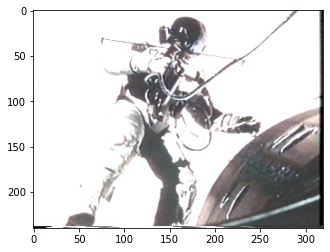

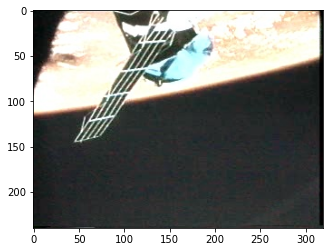

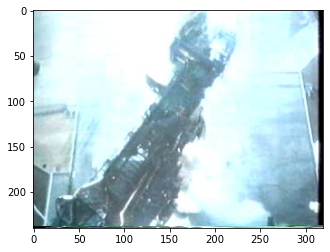

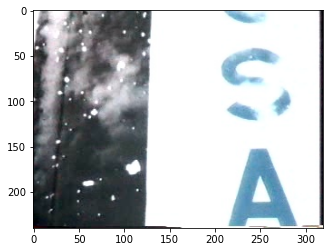

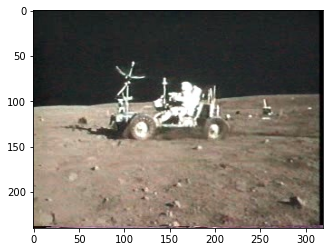

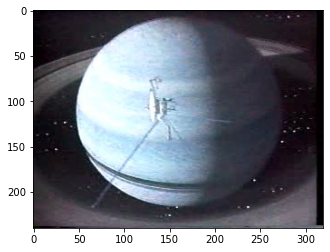

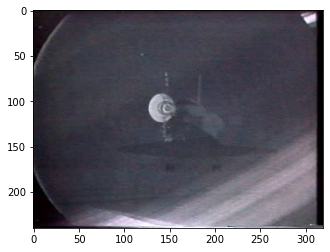

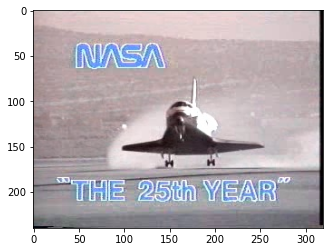

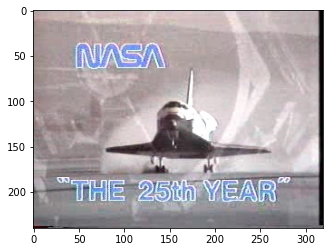

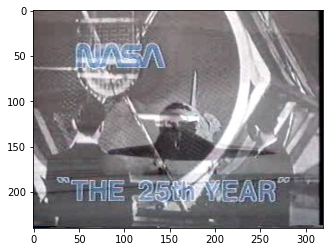

In [59]:
key_frames = list(min_frame.values())

count = 0
 
folder_dir = "C:\\Users\\Souvik\\Desktop\\Base Paper\\Frames"
for images in os.listdir(folder_dir):
    img = cv2.imread(os.path.join(folder_dir,images))
    count += 1
    if count in key_frames:
        plt.imshow(img)
        plt.show()

In [ ]:
# check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

In [58]:
key_frames = list(min_frame.values())
key_frames

[599, 640, 767, 100, 888, 875, 386, 203, 270, 507]

In [8]:
folder='C:/Users/Souvik/Desktop/Video1'
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [10]:
folder

'C:/Users/Souvik/Desktop/Video1'

In [45]:
path = r'C:\Users\Souvik\Desktop\Video1\frame0.jpg'

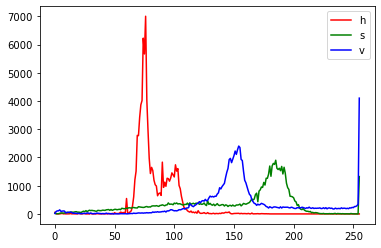

In [46]:
img = cv2.imread(path)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()